##### Introduction: This case study is a task for the Google Data Analyst Professional Certificate. The goal is to study the usage of smart devices to help Bellabeat  gain insights in one of their products. The case study starts at the next markdown.

<br>
<br>
<br>

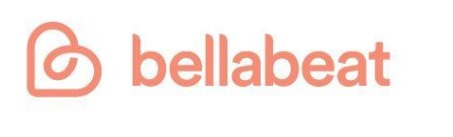
<br>
### Context

In this case study, we'll be examining the data collected from smart devices to uncover trends that can help improve Bellabeat product offerings. Let's first take a closer look at the products themselves:

* __Bellabeat app:__ The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
* __Leaf:__ Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
* __Time:__ This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
* __Spring:__ This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
* __Bellabeat membership:__ Bellabeat also offers a subscription-based membership program for users.Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals

### Summary

The main objective of this case study is to address the following inquiries:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

During the course of this study, these questions may evolve, and new ones may emerge. To conduct this analysis, we have utilized the FitBit Fitness tracker Data (CC0: Public Domain), which is accessible on Kaggle via the following link: https://www.kaggle.com/datasets/arashnic/fitbit.

In [1]:
# Starting environment and reading files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snc

In [2]:
dailyAc = pd.read_csv("dailyActivity_merged.csv")
dayInt = pd.read_csv("dailyIntensities_merged.csv")
heartR = pd.read_csv("heartrate_seconds_merged.csv")
hrInt = pd.read_csv("hourlyIntensities_merged.csv")
dayCal = pd.read_csv("dailyCalories_merged.csv")
weightLog = pd.read_csv("weightLogInfo_merged.csv")
sleepDay = pd.read_csv("sleepDay_merged.csv")

In [3]:
# Checking imported files
dailyAc.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
dayInt.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [5]:
heartR.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [6]:
hrInt.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [7]:
weightLog.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [8]:
dayCal.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [9]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


### Processing data

Let's clean the datasets.

Checking duplicated lines.

In [10]:
dailyAc_dupCount = dailyAc[dailyAc.duplicated()].shape[0]
dayInt_dupCount = dayInt[dayInt.duplicated()].shape[0]
heartR_dupCount = heartR[heartR.duplicated()].shape[0]
hrInt_dupCount = hrInt[hrInt.duplicated()].shape[0]
weightLog_dupCount = weightLog[weightLog.duplicated()].shape[0]
dayCal_dupCount = dayCal[dayCal.duplicated()].shape[0]
sleepDay_dupCount = sleepDay[sleepDay.duplicated()].shape[0]

print("dailyAc = ", dailyAc_dupCount)
print("dayInt = ", dayInt_dupCount)
print("heartR = ", heartR_dupCount)
print("hrInt = ", hrInt_dupCount)
print("weightLog = ", weightLog_dupCount)
print("dayCal = ", dayCal_dupCount)
print("sleepDay = ", sleepDay_dupCount)

dailyAc =  0
dayInt =  0
heartR =  0
hrInt =  0
weightLog =  0
dayCal =  0
sleepDay =  3


Found duplicates only in sleepDay, so let's remove it.

In [11]:
sleepDay = sleepDay.drop_duplicates(keep='first')

In [12]:
#Check duplicates again to make sure the lines have been removed.
sleepDay[sleepDay.duplicated()].shape[0]

0

Formatting "date" columns to date type, and splitting the time

In [13]:
dailyAc["ActivityDate"] = pd.to_datetime(dailyAc["ActivityDate"])
dayInt["ActivityDay"] = pd.to_datetime(dayInt["ActivityDay"])
dayCal["ActivityDay"] = pd.to_datetime(dayCal["ActivityDay"])

heartR["Time"] = pd.to_datetime(heartR["Time"], format="%m/%d/%Y %I:%M:%S %p")
heartR["Date"] = heartR["Time"].dt.date
heartR["Time"] = heartR["Time"].dt.time
heartR["Date"] = pd.to_datetime(heartR["Date"])

hrInt["ActivityHour"] = pd.to_datetime(hrInt["ActivityHour"], format="%m/%d/%Y %I:%M:%S %p")
hrInt["Date"] = hrInt["ActivityHour"].dt.date
hrInt["Time"] = hrInt["ActivityHour"].dt.time
hrInt["Date"] = pd.to_datetime(hrInt["Date"])

weightLog["oldDate"] = pd.to_datetime(weightLog["Date"], format="%m/%d/%Y %I:%M:%S %p")
weightLog["Date"] = weightLog["oldDate"].dt.date
weightLog["Time"] = weightLog["oldDate"].dt.time
weightLog["Date"] = pd.to_datetime(weightLog["Date"])


sleepDay["SleepDay"] = pd.to_datetime(sleepDay["SleepDay"], format="%m/%d/%Y %I:%M:%S %p")
sleepDay["Date"] = sleepDay["SleepDay"].dt.date
sleepDay["Time"] = sleepDay["SleepDay"].dt.time
sleepDay["Date"] = pd.to_datetime(sleepDay["Date"])


Adding columns weekday in each table, so later on in this project we could make analysis based on it.

In [14]:
dailyAc["weekday"] = dailyAc["ActivityDate"].dt.weekday
dayInt["weekday"] = dayInt["ActivityDay"].dt.weekday
dayCal["weekday"] = dayCal["ActivityDay"].dt.weekday
heartR["weekday"] = heartR["Date"].dt.weekday
hrInt["weekday"] = hrInt["Date"].dt.weekday
weightLog["weekday"] = weightLog["Date"].dt.weekday
sleepDay["weekday"] = sleepDay["Date"].dt.weekday

In [15]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

dailyAc["weekday"] = dailyAc["weekday"].map(weekdays)
dayInt["weekday"] = dayInt["weekday"].map(weekdays)
dayCal["weekday"] = dayCal["weekday"].map(weekdays)
heartR["weekday"] = heartR["weekday"].map(weekdays)
hrInt["weekday"] = hrInt["weekday"].map(weekdays)
weightLog["weekday"] = weightLog["weekday"].map(weekdays)
sleepDay["weekday"] = sleepDay["weekday"].map(weekdays)

### Checking data consistency.

In the following cells, we will conduct a data validation process to ensure that no critical data has been omitted during the cleaning process and to avoid any bias in the dataset.

We will begin by using data visualization techniques to confirm whether the number of individuals in this dataset is evenly distributed across the days and whether any fluctuations in user counts may result in significant modifications in other variables. We will then search for any outliers and attempt to determine the root cause behind them.

Please find below a graph that depicts the number of users by day.

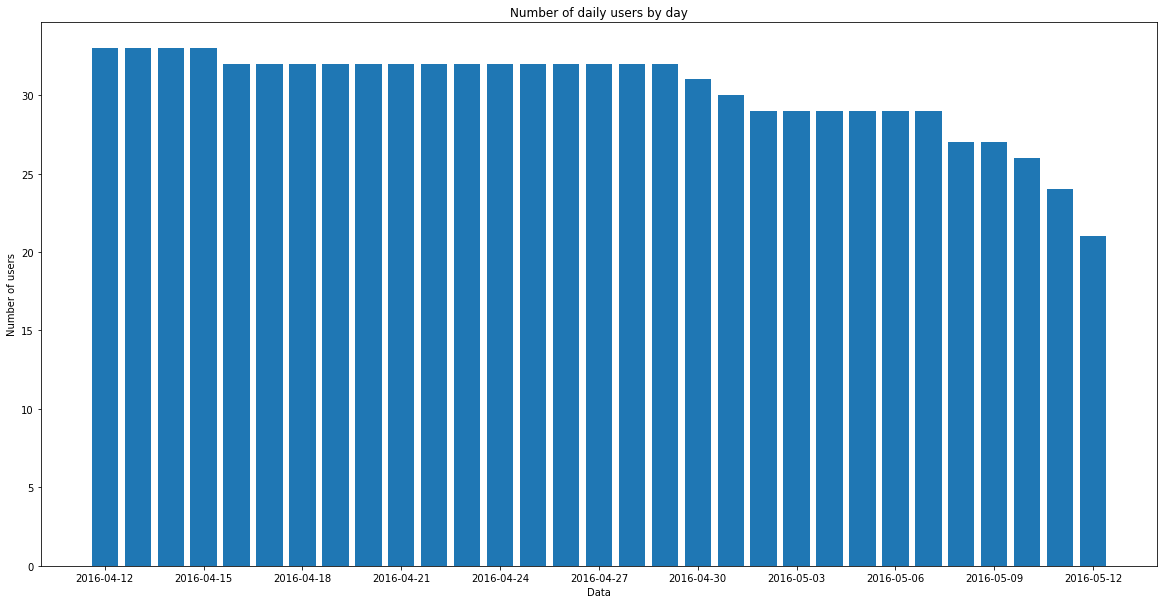

In [16]:
# Grouping users by day
countDays = dailyAc.groupby(dailyAc["ActivityDate"].dt.date)["Id"].count()

# Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(countDays.index, countDays.values)

# Setting labels
ax.set_xlabel('Data')
ax.set_ylabel('Number of users')
ax.set_title('Number of daily users by day')

# Adjusting x axis labels
ax.set_xticks(countDays.index[::3])  
ax.set_xticklabels(countDays.index[::3])

plt.show()

Based on the graph, we can see that the number of users of this smart device gradually decreases over time, but overall it remains relatively consistent. The most substantial drop is observed in the last three days. To ensure that this decrease does not affect our analysis, we will examine other variables to check if the decline is impacting our data. If so, we may consider removing the last three or five days from our analysis.

The following visualization is a graph that displays the average number of unique users by the day of the week.

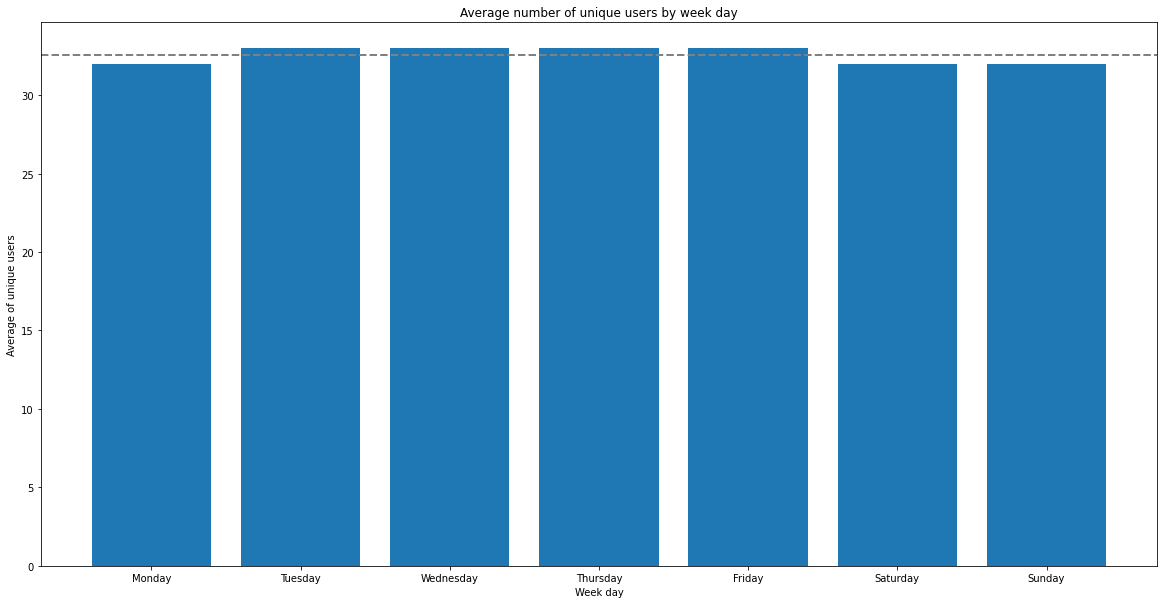

In [17]:
weekdaysOrder = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dailyAc["weekdayOrdered"] = pd.Categorical(dailyAc["weekday"], categories=weekdaysOrder, ordered=True)

fig, ax = plt.subplots(figsize=(20,10))

# Creating a average line in the vis.
avgUsersByDay = dailyAc.groupby("weekdayOrdered")["Id"].nunique().mean()
avgLine = ax.axhline(y=avgUsersByDay, color='gray', linestyle='--', linewidth=2)

# Groups data by day of the week and averages distinct users in each group.
countDays = dailyAc.groupby("weekdayOrdered")["Id"].nunique()

ax.bar(countDays.index, countDays.values)
ax.set_xlabel("Week day")
ax.set_ylabel("Average of unique users")
ax.set_title("Average number of unique users by week day")

plt.show()

Indeed, based on the second graph, the number of unique users appears to be relatively consistent across the days of the week, which suggests that the decrease observed in the first graph may not significantly impact our analysis.

The following visualization displays the average total intensity per day.

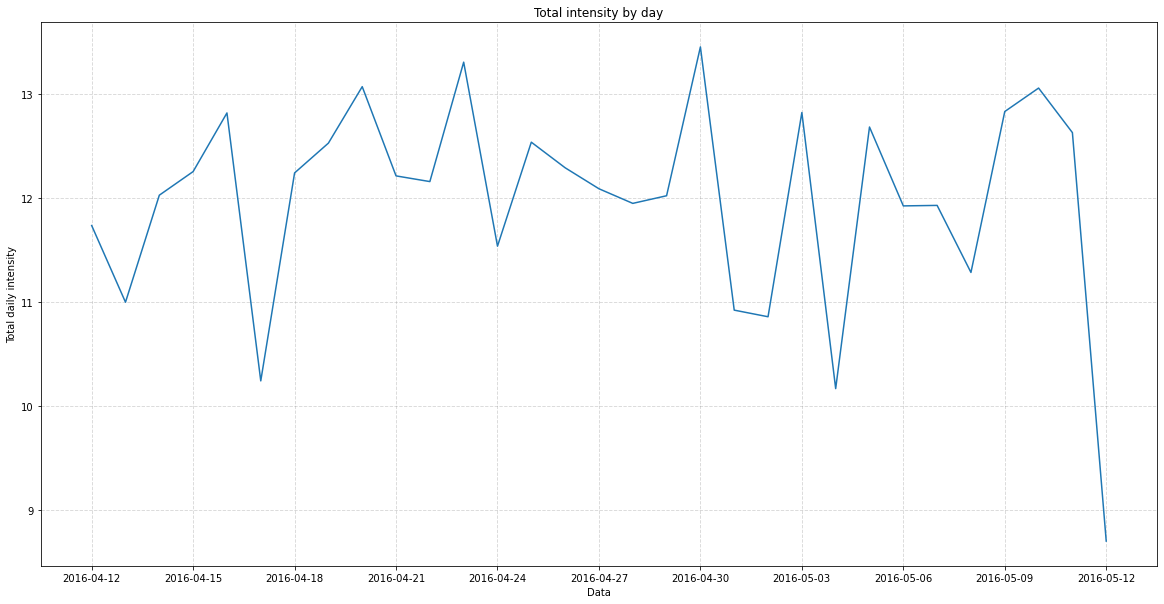

In [18]:
countInt = hrInt.groupby(hrInt["Date"].dt.date)["TotalIntensity"].mean()

# Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Data")
ax.set_ylabel("Total daily intensity")
ax.set_title("Total intensity by day")

# Ploting the series (Total intensity)
color = 'tab:blue'
ax.plot(countInt.index, countInt.values, color=color)
ax.tick_params(axis='y')
ax.grid(color = 'gray', alpha = 0.3, linestyle = 'dashed', linewidth = 0.9)

# Adjusting x-axis labels
ax.set_xticks(countInt.index[::3])  
ax.set_xticklabels(countInt.index[::3])


plt.show()

According to the data dictionary, "Intensity" is a value calculated by adding all the minute-level
intensity values that occurred within the hour. So it's a value calculated by another activity values in the dataset. 
<br>
Data dictionary can be found in this link: https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf

The graph above illustrates some fluctuations in total intensity across the days, but overall it remains relatively consistent, hovering mostly between 11 and 13. The exceptions are two days that recorded lower intensity levels than the rest, and the last day, which we know had fewer users.

To further examine the two days that recorded lower intensity levels, we will conduct additional analysis. We will also look at the same graph by weekday to determine if there are any underlying trends.

In [19]:
lowerInt = hrInt.groupby(hrInt["Date"].dt.date)["TotalIntensity"].mean()
lowerInt = lowerInt.sort_values(ascending=True)
lowerInt.head(8)

Date
2016-05-12     8.698842
2016-05-04    10.165230
2016-04-17    10.239583
2016-05-02    10.856322
2016-05-01    10.919944
2016-04-13    10.996212
2016-05-08    11.282407
2016-04-24    11.535156
Name: TotalIntensity, dtype: float64

Based on the information, it doesn't appear that there is a clear pattern to explain the lower intensity levels observed on April 17th and May 4th.

The following visualization displays the average total intensity per day of the week.

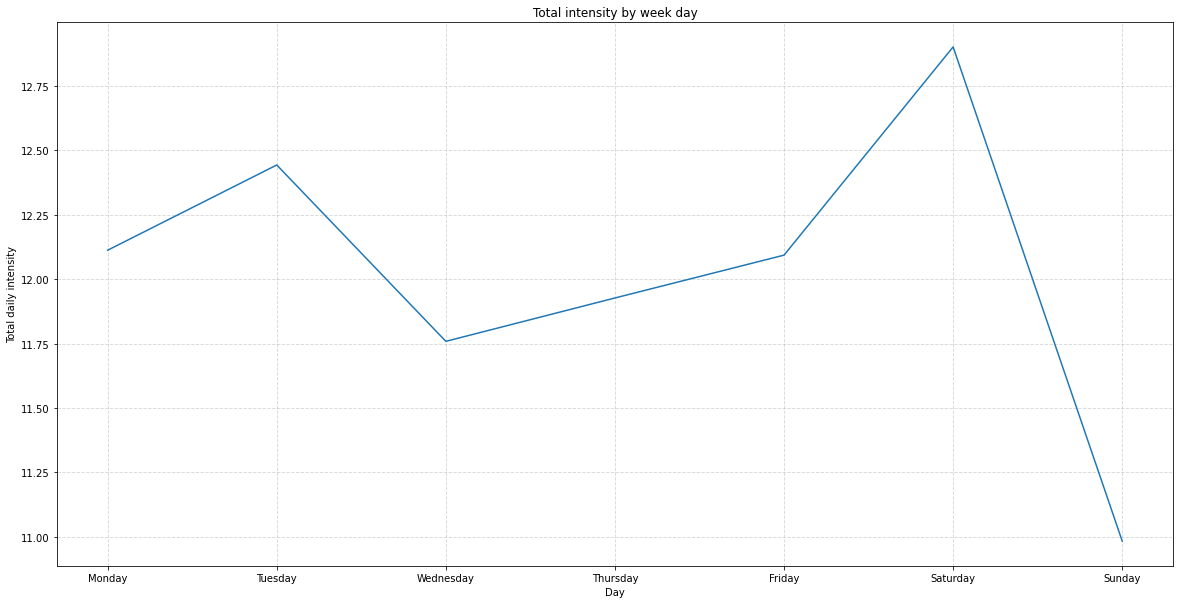

In [20]:
countInt = hrInt
countInt["weekdayOrdered"] = pd.Categorical(countInt["weekday"], categories=weekdaysOrder, ordered=True)
countInt = hrInt.groupby(countInt["weekdayOrdered"])["TotalIntensity"].mean()

# Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Day")
ax.set_ylabel("Total daily intensity")
ax.set_title("Total intensity by week day")
ax.grid(color = 'gray', alpha = 0.3, linestyle = 'dashed', linewidth = 0.9)

# Ploting the series (Total intensity)
color = 'tab:blue'
ax.plot(countInt.index, countInt.values, color=color)
ax.tick_params(axis='y')

plt.show()

Indeed, the graph shows a clear pattern where the total intensity levels are normally increasing by the week, the exception is the Sunday (where is the lower value) and Wednesday, with Sunday being the day with the lowest levels.

The following visualization displays the average total intensity by hour of the day.

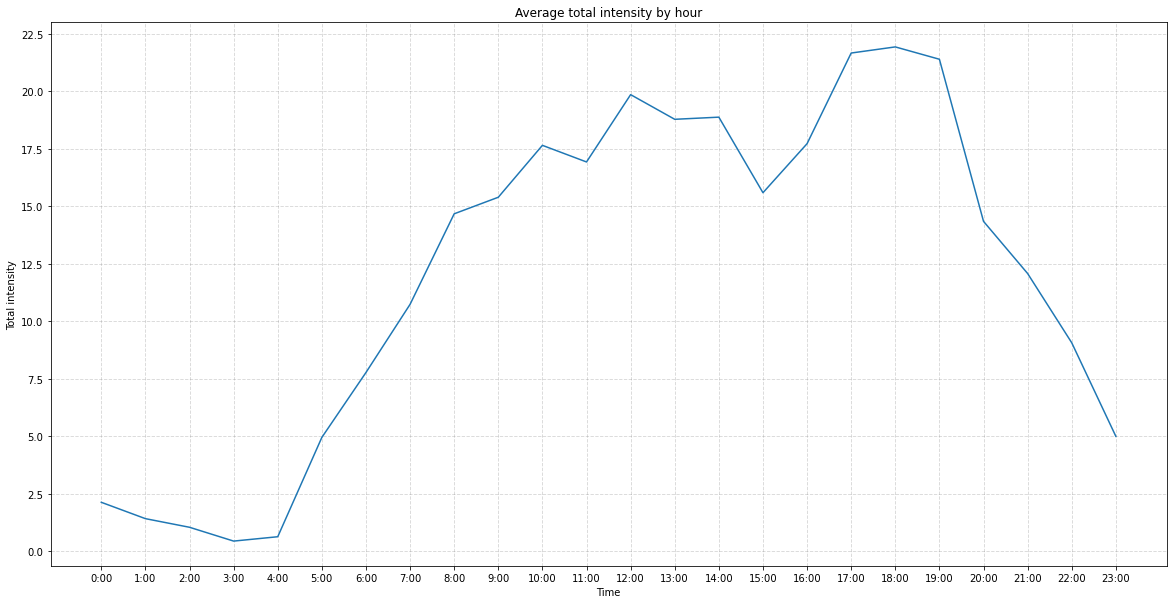

In [21]:
hrInt["Time"] = pd.to_datetime(hrInt["Time"], format='%H:%M:%S')
countInt = hrInt.groupby(hrInt["Time"].dt.hour)["TotalIntensity"].mean()

# Creating graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Time")
ax.set_ylabel("Total intensity")
ax.set_title("Average total intensity by hour")

# Ploting the series (Total intensity)
color = 'tab:blue'
ax.plot(countInt.index, countInt.values, color=color)
ax.tick_params(axis='y')
ax.grid(color = 'gray', alpha = 0.3, linestyle = 'dashed', linewidth = 0.9)
y_ticks = np.arange(0, ax.get_ylim()[1]+1, 2.5)
ax.set_yticks(y_ticks)

# Formatting x-axis labels
hourLabels = [str(h) + ':00' for h in range(24)]
ax.set_xticks(range(24))
ax.set_xticklabels(hourLabels)

plt.show()

As expected, the highest intensity of smart device usage is between 7:00AM and 9:00PM, which aligns with the time when most people are awake.

Moving on to the weight log table, it is apparent that the "Fat" column has several missing values, with only two entries available. Thus, this column will not be used in our analysis. However, the "BMI" column can help estimate the height of the users, which can be useful for future projects.

Furthermore, the weight log table contains two columns, "WeightKg" and "WeightPounds," so it is important to ensure the accuracy and consistency of the information in these columns. Additionally, there is a column indicating whether the report was manually entered or not, which will also be considered in our analysis.

In [22]:
weightLog.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [23]:
weightLog.groupby(weightLog["Id"]).count()

,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,oldDate,Time,weekday
Id,,,,,,,,,,
1503960366,2,2,2,1,2,2,2,2,2,2
1927972279,1,1,1,0,1,1,1,1,1,1
2873212765,2,2,2,0,2,2,2,2,2,2
4319703577,2,2,2,1,2,2,2,2,2,2
4558609924,5,5,5,0,5,5,5,5,5,5
5577150313,1,1,1,0,1,1,1,1,1,1
6962181067,30,30,30,0,30,30,30,30,30,30
8877689391,24,24,24,0,24,24,24,24,24,24


In [24]:
weightLog["WeightConversionTest"] = abs((weightLog["WeightKg"] * 2.20462) - weightLog["WeightPounds"]) <= 0.01

weightLog["WeightConversionTest"].value_counts()

True    67
Name: WeightConversionTest, dtype: int64

In [25]:
weightLog["IsManualReport"].value_counts()

True     41
False    26
Name: IsManualReport, dtype: int64

In [26]:
weightLog.groupby(weightLog["Id"])["IsManualReport"].value_counts()

Id          IsManualReport
1503960366  True               2
1927972279  False              1
2873212765  True               2
4319703577  True               2
4558609924  True               5
5577150313  False              1
6962181067  True              30
8877689391  False             24
Name: IsManualReport, dtype: int64

We now know that this weight log table contains 67 entries, with the majority of them coming from just 2 users who likely tracked their weight daily. However, many of the other users did not do the same. While the number of entries per person is not a concern, the fact that there are only 8 people represented in the table could potentially lead to bias. This is something to keep in mind when working with this data.

Moving on, let's take a look at the number of users by day and the calories they've spent.

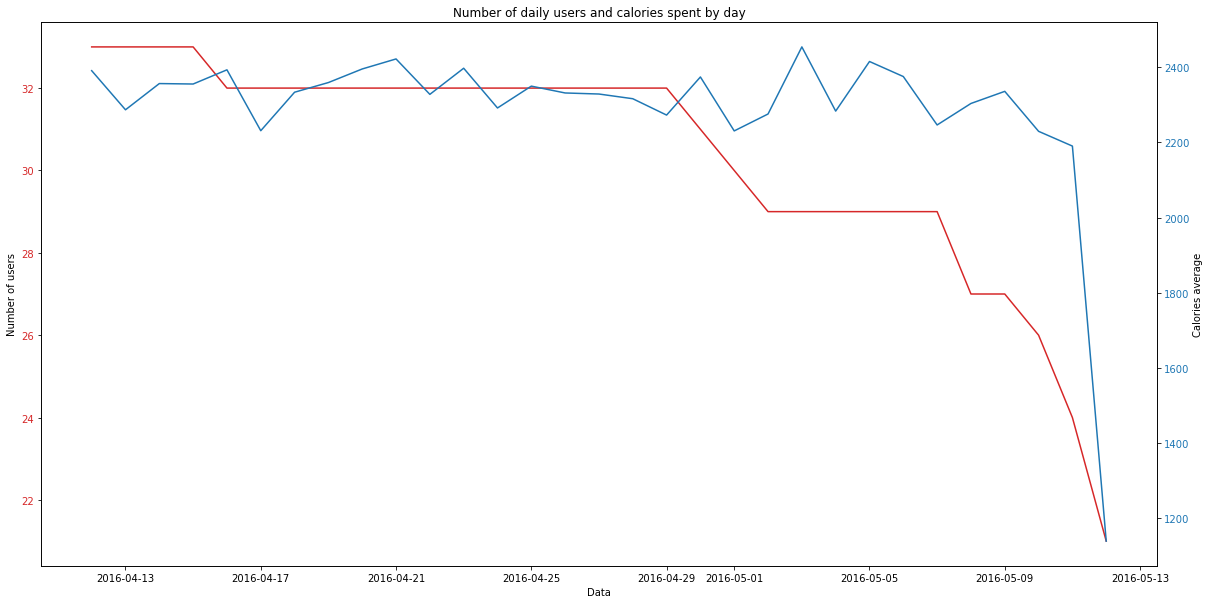

In [27]:
countDays = dayCal.groupby(dayCal["ActivityDay"].dt.date)["Id"].count()

calorieByDay = dayCal.groupby(dayCal["ActivityDay"].dt.date)["Calories"].mean()

# Creating graph
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel("Data")
ax1.set_ylabel("Number of users")
ax1.set_title("Number of daily users and calories spent by day")

# Ploting the first series (number of users)
color = 'tab:red'
ax1.plot(countDays.index, countDays.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Adjusting x-axis labels
ax1.set_xticks(countDays.index[::3])  
ax1.set_xticklabels(countDays.index[::3])

# Creating second y-axis and second series (average calories by users)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(calorieByDay.index, calorieByDay.values, color=color)
ax2.set_ylabel("Calories average")
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In this graph, we can observe that the calories spent remain consistent throughout the days. However, there is some fluctuation, which is expected, as different people have varying exercise, movement, sleep, and other habits that can affect the calories burned.

The data on calories spent is vital for improving almost all BellaBeat products. Although it doesn't provide an exact measure of a person's lifestyle, it can be used to customize the functions offered by the products. For example, the app can suggest how much water a person should drink based on Spring's water intake and calories spent.

From our analysis so far, we can conclude that removing the data from the last day can improve accuracy and reduce bias. However, we won't remove it because not all data is influenced by this difference, as shown in Figure 2. This will be a point to consider during the analysis phase of this project.

### Analisys

An initial analysis has already been conducted in the processing and checking phase of this project. However, now we will delve deeper into the data to answer Bellabeat's business questions.

It is important to note that this dataset is not solely from Bellabeat customers but was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Therefore, we can view it as general data from people using smart devices rather than Bellabeat devices.

Additionally, there is no information about the gender of the participants in this dataset. Bellabeat products are targeted towards women, and this distinction is not available in this dataset. Therefore, this is another factor to consider when analyzing the data.

Moving on to the analysis, let's first examine the weight and calories burned by the users. We also are going to calculate user's height.

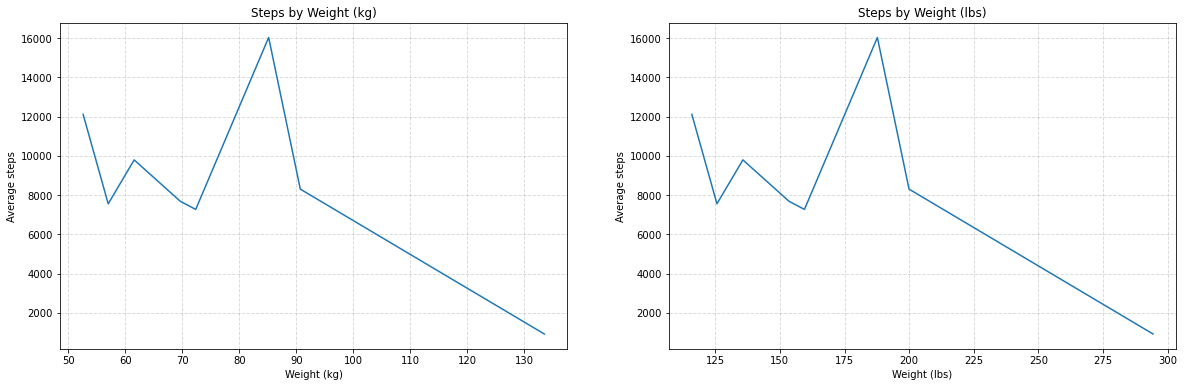

In [28]:
weightAvg = weightLog.groupby("Id")[["WeightKg", "WeightPounds"]].mean().reset_index()

df_kg = pd.merge(dailyAc, weightAvg[["Id", "WeightKg"]], on="Id")
df_kg = df_kg.groupby("WeightKg")["TotalSteps"].mean().reset_index()
df_kg = df_kg.sort_values("WeightKg")

df_lbs = pd.merge(dailyAc, weightAvg[["Id", "WeightPounds"]], on="Id")
df_lbs = df_lbs.groupby("WeightPounds")["TotalSteps"].mean().reset_index()
df_lbs = df_lbs.sort_values("WeightPounds")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axs[0].plot(df_kg["WeightKg"], df_kg["TotalSteps"])
axs[0].set_xlabel("Weight (kg)")
axs[0].set_ylabel("Average steps")
axs[0].set_title("Steps by Weight (kg)")
axs[0].grid(color="gray", alpha=0.3, linestyle="dashed", linewidth=0.9)

axs[1].plot(df_lbs["WeightPounds"], df_lbs["TotalSteps"])
axs[1].set_xlabel("Weight (lbs)")
axs[1].set_ylabel("Average steps")
axs[1].set_title("Steps by Weight (lbs)")
axs[1].grid(color='gray', alpha=0.3, linestyle='dashed', linewidth=0.9)

plt.show()

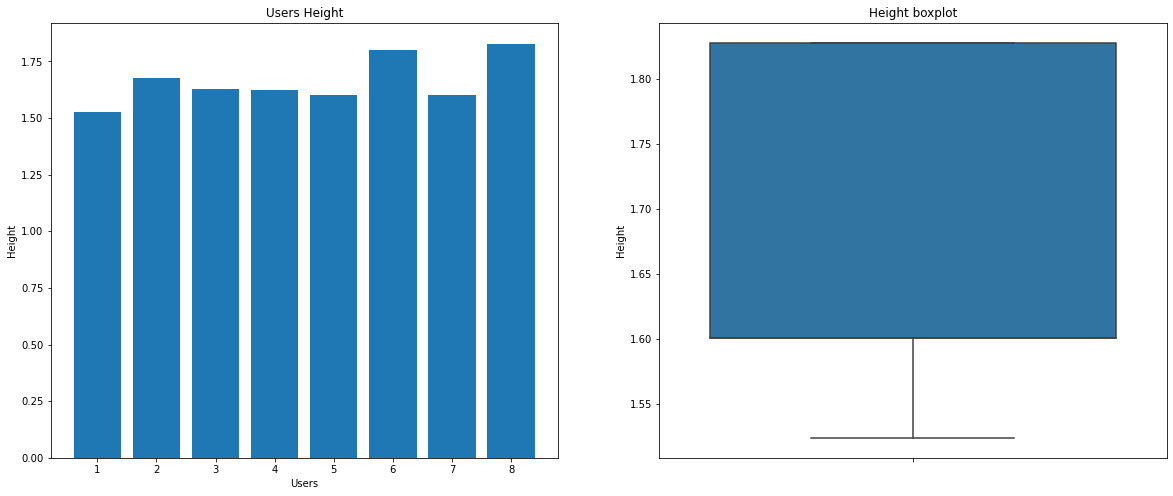

In [29]:
weightLog["Height"] = (weightLog["WeightKg"]/weightLog["BMI"])**(1/2)

df_kg = weightLog.groupby("Id")["Height"].mean()

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
axs[0].bar(range(1, len(df_kg)+1), df_kg.values)
axs[0].set_xticks(range(1, len(df_kg)+1))
axs[0].set_xticklabels(range(1, len(df_kg)+1))

axs[0].set_xlabel("Users")
axs[0].set_ylabel("Height")
axs[0].set_title("Users Height")

snc.boxplot(y=weightLog["Height"], ax=axs[1])
axs[1].set_title("Height boxplot")

plt.show()

In [30]:
df_kg.describe()

count    8.000000
mean     1.659697
std      0.104250
min      1.523908
25%      1.600326
50%      1.625059
75%      1.706768
max      1.827770
Name: Height, dtype: float64

In [31]:
print ("Average height = {:.3f}".format(df_kg.mean()), "m")

Average height = 1.660 m


Notice that these results have two limitations related to the data used. Firstly, the number of weight records only represent 25% of the users, which may limit the generalizability of the findings. Secondly, as previously discussed, it is crucial to acknowledge that this data does not exclusively pertain to Bellabeat customers.

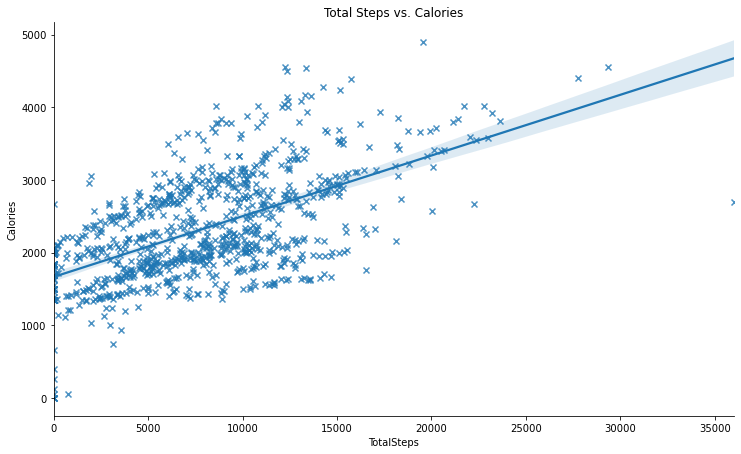

In [32]:
sns = snc.lmplot(data=dailyAc, x="TotalSteps", y="Calories", fit_reg=True, height=6, aspect=1.7, markers="x")
sns.set(title="Total Steps vs. Calories")

plt.show()

There appears to be a strong correlation between the number of steps taken and the calories burned per day. It is possible that individuals with higher weights tend to walk less and therefore burn fewer calories. However, as there are relatively few weight records in this dataset, this relationship may not be definitive.

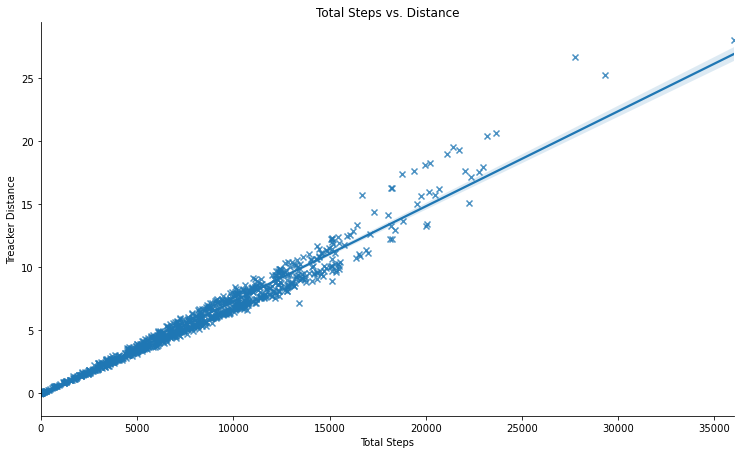

In [33]:
sns = snc.lmplot(data=dailyAc, x="TotalSteps", y="TrackerDistance", fit_reg=True, height=6, aspect=1.7, markers="x")

plt.xlabel("Total Steps")
plt.ylabel("Treacker Distance")
plt.title("Total Steps vs. Distance")

plt.show()

The correlation between the number of steps and the distance walked is expected and has been confirmed by the scatter plot.

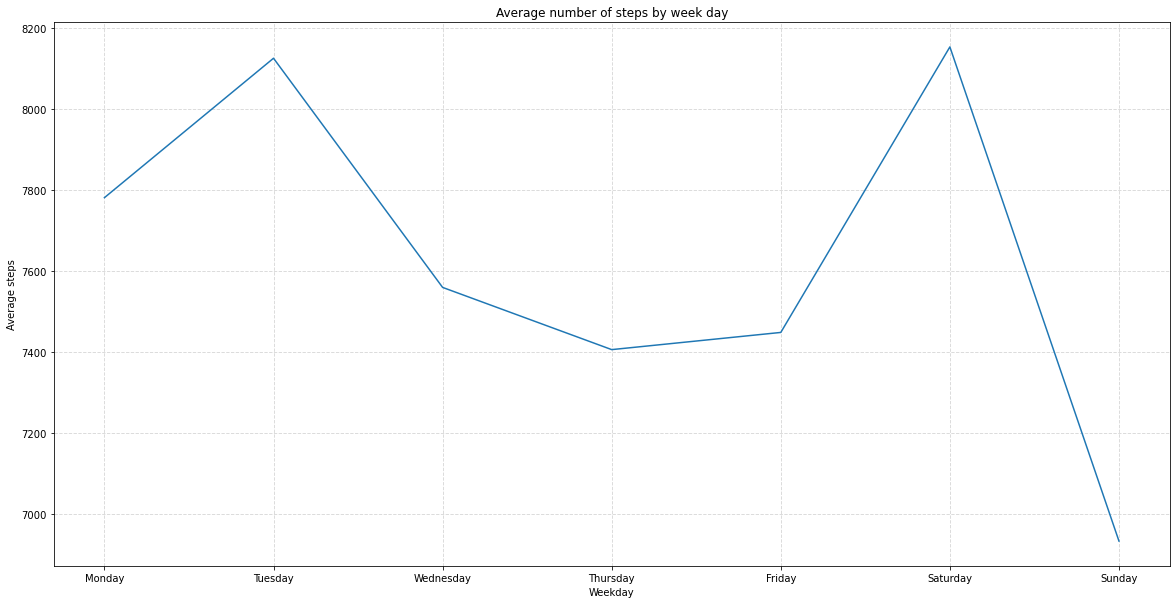

In [34]:
dailyAc["weekdayOrdered"] = pd.Categorical(dailyAc["weekday"], categories=weekdaysOrder, ordered=True)

weekSteps = dailyAc.groupby("weekdayOrdered")["TotalSteps"].mean()

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(weekSteps.index, weekSteps.values)
ax.set_xlabel("Weekday")
ax.set_ylabel("Average steps")
ax.set_title("Average number of steps by week day")
ax.grid(color = 'gray', alpha = 0.3, linestyle = 'dashed', linewidth = 0.9)

plt.show()

The pattern observed in this graph is similar to the "Intensity x Weekday" graph seen earlier. This provides strong confirmation that people tend to be less active on Sundays and in the middle of the week.

Considering that the number of steps correlates with calories burned, and intensity also correlates with calories burned, it can be expected that intensity and calories burned will exhibit a positive correlation as well when analyzed.

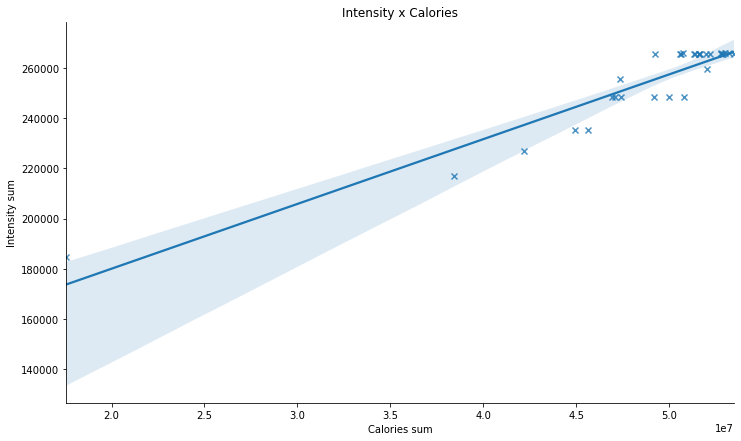

In [35]:
df_temp = pd.merge(dailyAc, hrInt, on="Id")
sum_cal = df_temp.query("Calories != 0").groupby("ActivityDate")["Calories"].sum()
sum_int = df_temp.query("TotalIntensity != 0").groupby("ActivityDate")["TotalIntensity"].sum()
df_temp = pd.DataFrame({"Calories": sum_cal, "Intensity": sum_int})

snc.lmplot(data=df_temp, x="Calories", y="Intensity", height=6, aspect=1.7, markers="x")
plt.xlabel("Calories sum")
plt.ylabel("Intensity sum")
plt.title("Intensity x Calories")
plt.show()

This visualization shows the total intensity per day x total calories burned per day. While there appears to be a correlation between the two, there are too few data points to make any definitive conclusions. It is also important to note that the visible clusters in the chart are partly due to the calculation method for intensity, but they do reinforce the notion that greater intensity results in more calories burned.

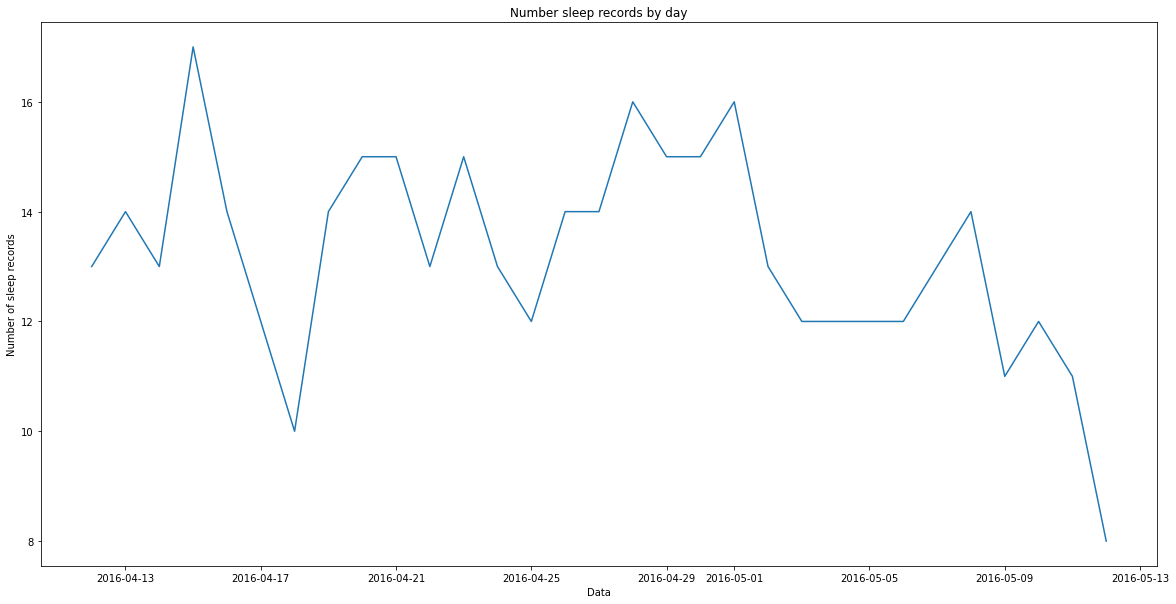

In [36]:
df_temp = sleepDay.groupby("SleepDay")["Id"].count()

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Data")
ax.set_ylabel("Number of sleep records")
ax.set_title("Number sleep records by day")

ax.plot(df_temp.index, df_temp.values, color=color)
ax.tick_params(axis='y')

# Adjusting x-axis labels
ax1.set_xticks(countDays.index[::3])  
ax1.set_xticklabels(countDays.index[::3])

plt.show()

This graph shows us that sleep records are not available for all users. This could be due to missing data, but it could also indicate that some users do not wear their device while sleeping.

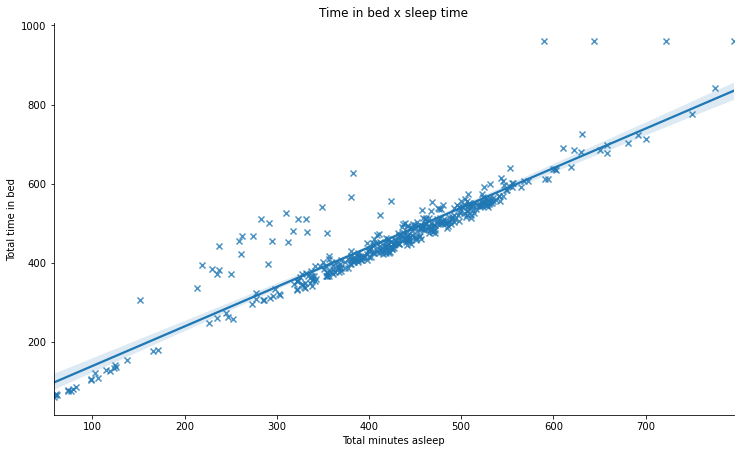

In [37]:
sns = snc.lmplot(data=sleepDay, x="TotalMinutesAsleep", y="TotalTimeInBed", fit_reg=True, height=6, aspect=1.7, markers="x")
plt.xlabel("Total minutes asleep")
plt.ylabel("Total time in bed")
plt.title("Time in bed x sleep time")
plt.show()

Here is a visualization of the relationship between time in bed and time sleeping. As expected, there is a positive correlation between the two variables, and there are noticeable clusters throughout the graph. In this case, the clusters may indicate records from the same individual that are grouped together or a trend across multiple individuals. It is noteworthy that the largest cluster is situated in the middle of the graph, which suggests that it represents a substantial number of individuals.

#### The user preference hypothesis.

While going through this data, I noticed that in different parts of this analysis, there are some Ids that are not present in all tables. This could indicate a variety of factors, ranging from missing data to differences in the devices or apps used by the individuals represented in this data. It is also possible that some users simply chose not to share certain data.

Based on this observation, I have developed a hypothesis: What if this missing data can be used to infer user preferences?

The objective is not to prove or disprove this hypothesis, but rather to analyze the differences and identify patterns that could influence Bellabeat products in some way. To accomplish this, we will count the number of users present in one table relative to another. It is evident that all users are included in the "dailyActivity_merged.csv" table, denoted as "dailyAc" in the code, but only a fraction of those users appear in other tables. This is what we will investigate.

In [38]:
dailyAc_count = dailyAc["Id"].nunique()
dayInt_count = dayInt["Id"].nunique()
heartR_count = heartR["Id"].nunique()
hrInt_count = hrInt["Id"].nunique()
dayCal_count = dayCal["Id"].nunique()
weightLog_count = weightLog["Id"].nunique()
sleepDay_count = sleepDay["Id"].nunique()

print("dailyAc_count = ", dailyAc_count)
print("dayInt_count = ", dayInt_count)
print("heartR_count = ", heartR_count)
print("hrInt_count = ", hrInt_count)
print("dayCal_count = ", dayCal_count)
print("weightLog_count = ", weightLog_count)
print("sleepDay_count = ", sleepDay_count)

dailyAc_count =  33
dayInt_count =  33
heartR_count =  14
hrInt_count =  33
dayCal_count =  33
weightLog_count =  8
sleepDay_count =  24


It is evident that only three tables have missing IDs. Although there are additional tables in the complete dataset that are not included in this report, most of them contain redundant data. Therefore, the next step is to determine how many users are present in more than one of these three tables.

In [39]:
heartR_weight = pd.merge(heartR["Id"], weightLog["Id"], on="Id").drop_duplicates().shape[0]
heartR_sleep = pd.merge(heartR["Id"], sleepDay["Id"], on="Id").drop_duplicates().shape[0]
weight_sleep = pd.merge(weightLog["Id"], sleepDay["Id"], on="Id").drop_duplicates().shape[0]
weight_sleep_heartR = pd.merge(weightLog["Id"], sleepDay["Id"], on="Id").drop_duplicates()
weight_sleep_heartR = pd.merge(weight_sleep_heartR, heartR["Id"], on="Id").drop_duplicates().shape[0]

print("Number of users with heart rate and weight records = ", heartR_weight)
print("Number of users with heart rate and sleep records = ", heartR_sleep)
print("Number of users with weight and sleep records = ", weight_sleep)
print("Number of users with the 3 records = ", weight_sleep_heartR)

Number of users with heart rate and weight records =  4
Number of users with heart rate and sleep records =  12
Number of users with weight and sleep records =  6
Number of users with the 3 records =  3


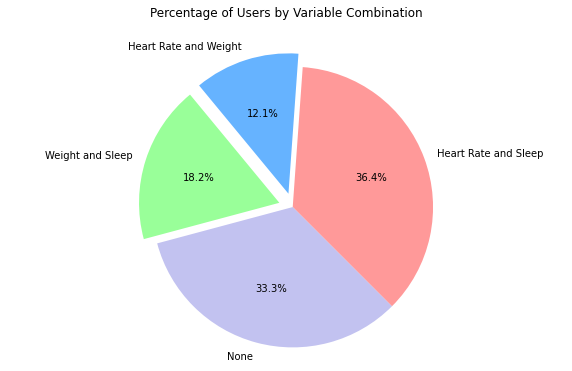

In [40]:
total_users = dailyAc_count

percentage_heartR_weight = (heartR_weight / total_users) * 100
percentage_heartR_sleep = (heartR_sleep / total_users) * 100
percentage_weight_sleep = (weight_sleep / total_users) * 100
percentage_weight_sleep_heartR = (weight_sleep_heartR / total_users) * 100


labels = ["Heart Rate and Sleep", "Heart Rate and Weight", "Weight and Sleep", "None"]
sizes = [percentage_heartR_sleep, percentage_heartR_weight, percentage_weight_sleep, (100 - (percentage_heartR_weight + percentage_heartR_sleep + percentage_weight_sleep))]
colors = ["#ff9999", "#66b3ff", "#99ff99", "#c2c2f0", "#d3d3d3"]
explode = (0, 0.1, 0.1, 0)

fig = plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=315)
plt.axis("equal") 

plt.title("Percentage of Users by Variable Combination\n")
plt.show()

In [41]:
print("Heart Rate and Sleep {:.2f}".format(percentage_heartR_sleep), "%")
print("Heart Rate and Weight {:.2f}".format(percentage_heartR_weight), "%")
print("Weight and Sleep {:.2f}".format(percentage_weight_sleep), "%")
print("All three {:.2f}".format(percentage_weight_sleep_heartR), "%")
print("None {:.2f}".format(100 - (percentage_heartR_weight + percentage_heartR_sleep + percentage_weight_sleep)), "%")

Heart Rate and Sleep 36.36 %
Heart Rate and Weight 12.12 %
Weight and Sleep 18.18 %
All three 9.09 %
None 33.33 %


The analysis of users with records in multiple tables provides valuable insights into potential user preferences. The percentages reveal interesting patterns:

* __Heart Rate and Sleep__: Approximately 36.36% of users have records of both heart rate and sleep. This can be attributed to the fact that sleep records have the largest number of unique IDs, while heart rate sensors are commonly found in smart wearables. It is important to note that sleep records fluctuate over the days, as mentioned earlier.

* __Heart Rate and Weight__: Around 12.12% of users have records of both heart rate and weight. This percentage is primarily influenced by the availability of heart rate data, as there are only 8 weight records in the dataset.

* __Weight and Sleep__: Approximately 18.18% of users have records of both weight and sleep. Once again, this is mainly due to the higher number of sleep records compared to weight records.

* __All Three Records__: Remarkably, 9.09% of users have records of heart rate, weight, and sleep. This subgroup represents individuals who actively track multiple aspects of their health and well-being.

* __None__: The remaining 33% represents the missing IDs from all tables, indicating users who have not provided records in any of the three categories.

These findings highlight different user preferences and the varying availability of data in different categories. Understanding these patterns can help Bellabeat make informed decisions regarding product development, customization, and marketing strategies to better meet the diverse needs of their users.

### Conclusion

#### Analysis summary:
* __Device usage__: It's noticeable that the number of users decrease with time. But the overall usage statistics remain consistent.
* __Intensity__: Intensity it's helpful to verify user's activity, and can correlate with device usage too.
* __Height__: It was discovered that the average height is 1.66 m, which can be valuable for developing new products.
* __Calories burn__: There is a correlation between higher activity levels and increased calorie burn, which can be utilized to enhance customization for Bellabeat customers.
* __Activity throughout the week__: It has been observed that individuals tend to be less active on Sundays and during the middle to end portion of the week.
* __Sleep records__: Not all users have sleep records, and the availability of these records varies throughout the data collection period.
* __Time in bed__:  Time spent in bed directly correlates with sleep time, but there are instances of users remaining awake in bed.
* __Not everyone shares weight__:  It could be a personal preference, or perhaps they do not measure their weight regularly. In this dataset, only 24.2% of the users have provided their weight information. It is interesting to note that out of the total users, only three individuals do not have a manual entry for their weight data.
* __Relevant data that this dataset doesn't have__: The dataset lacks information on gender and water ingestion.


#### Recomendations:
1. __Encourage app users to complete a quick survey__: Conducting a survey will enable customization of the app with unique features tailored to individual users. This will result in a cleaner and more user-friendly app that can be highly personalized. Users should have the option to modify their answers in the app settings as their objectives change over time. Survey data can also be correlated with data measured by the devices, assisting users in setting and achieving their goals. Additionally, this data can be used to create user clusters and provide better recommendations for the Bellabeat membership program. Offering occasional free membership features can also generate greater interest in the program.

2. __New UI for the app__: Using data gathered with the survey and data gathered with the devices, I recommend recreating the app user interface. This new UI can count with a nicer dashboard where users objectives are well visible. A well-designed and game-like dashboard would be a great help for users to set and achieve their goals whichever they are.

3. __Notification hub and agenda__: Implement a calendar-like schedule within the app that provides recommendations based on survey responses. If it's not feasible, an integration with Google Calendar will work the same. This schedule can be analyzed to send notifications reminding users to wear their devices and informing them of the optimal time to recharge them, thereby extending usage. Since not all users wear the device while sleeping, and the usage fluctuates daily, a notification prompting users to recharge the device during the day can lead to improved sleep tracking.

4. __New product__: Considering the limited availability of weight data in the dataset, it suggests that some users may not have access to a scale or a smart scale. In light of this observation, I propose exploring the development of a smart scale that would enable customers to easily track their weight. However, before proceeding with this recommendation, it is crucial to analyze the company's proprietary data to gather more insights and validate the feasibility and potential demand for such a product. This leads us to the next recommendation.

5. __Recreate this work with newer data (preferably Bellabeat data)__: It is important to note that the analyzed dataset is quite old. While some aspects may not have significantly changed over time due to human physiology, our habits and lifestyles have evolved, especially considering recent global events like the pandemic. It is crucial to consider the gender aspect, particularly for products designed for women. Additionally, including menstrual cycle data would be a valuable addition, as it is already a feature offered in the app.

#### Roadmap
To ensure an effective implementation of the recommendations, it is advisable to adopt a phased approach. This approach offers several advantages, such as the ability to measure and analyze user data, confirm the effectiveness of the changes, and manage the financial cost of implementation over an extended period. Since most of the recommendations involve the app and data, leveraging existing development and data teams can result in cost savings.

The suggested implementation sequence is as follows:

1. Survey Implementation: The first step would be to implement the survey, gathering user responses to enhance the recreation of this project. The survey results will provide valuable insights for subsequent analyses. This implementation can be initiated concurrently with other activities.

2. New Analysis Project: The second implementation phase involves conducting a new analysis project using the survey data. This analysis will provide further insights for the development of the smart scale and inform potential changes to the app.

3. App User Interface (UI) Redesign: The subsequent focus would be on developing a new app UI. This can be carried out in parallel with the implementation of the agenda feature, allowing the development and data teams to work together effectively.

4. Agenda Implementation: The agenda feature, integrated with the app, can be developed alongside the app UI redesign. This collaborative effort between the development and data teams will ensure a seamless user experience.

5. Smart Scale Development: The development of the smart scale should be the next priority after the app and UI improvements. This stage involves multiple teams and requires time for design and manufacturing. It is essential to initiate the design process promptly, pending confirmation from the analysis project indicating the viability of the smart scale.

By prioritizing the smart scale development last, sufficient time is allotted for collaboration among teams and the production of a physical product. The goal is to commence the design phase immediately after the completion of the next analysis, with the launch of the Bellabeat scale following the app redesign.

The duration of each step can vary from one week to one month, depending on the complexity of implementation and the need to gather and analyze new data. Flexibility in the timeline will enable thorough evaluations and ensure optimal outcomes at each stage.